In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

In [211]:
desu = pd.read_csv('sports_injury1.csv')

In [212]:
desu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1100 non-null   int64  
 1   Gender                   1100 non-null   object 
 2   Sport                    1100 non-null   object 
 3   Training_Hours_per_Week  1100 non-null   int64  
 4   Previous_Injuries        1100 non-null   int64  
 5   BMI                      1100 non-null   float64
 6   Injury_Risk              1100 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 60.3+ KB


In [213]:
desu.head()

,Age,Gender,Sport,Training_Hours_per_Week,Previous_Injuries,BMI,Injury_Risk
0,30,Male,Basketball,17,0,20.3,High
1,21,Female,Athletics,10,1,28.1,Low
2,33,Male,Rugby,6,3,20.0,Low
3,31,Female,Athletics,12,5,28.6,Low
4,34,Male,Basketball,13,3,29.4,Low


In [214]:
print(f"Dataset shape: {desu.shape}")

Dataset shape: (1100, 7)


In [215]:
print(desu.isnull().sum())

Age                        0
Gender                     0
Sport                      0
Training_Hours_per_Week    0
Previous_Injuries          0
BMI                        0
Injury_Risk                0
dtype: int64


In [216]:
desu.describe()

,Age,Training_Hours_per_Week,Previous_Injuries,BMI
count,1100.000000,1100.000000,1100.000000,1100.000000
mean,26.513636,15.055455,2.490000,24.059091
std,5.179296,6.069930,1.739361,3.463119
min,18.000000,5.000000,0.000000,18.000000
25%,22.000000,10.000000,1.000000,21.000000
50%,27.000000,15.000000,2.500000,24.100000
75%,31.000000,20.000000,4.000000,27.000000
max,35.000000,25.000000,5.000000,30.000000


In [217]:
desu.sort_values("Age", ascending = False,inplace= True)

In [218]:
desu

,Age,Gender,Sport,Training_Hours_per_Week,Previous_Injuries,BMI,Injury_Risk
279,35,Female,Rugby,15,0,24.0,Moderate
280,35,Female,Tennis,23,5,25.0,Moderate
353,35,Female,Rugby,18,3,23.7,High
351,35,Male,Athletics,24,4,23.7,High
1017,35,Female,Rugby,23,1,22.7,High
...,...,...,...,...,...,...,...
491,18,Female,Soccer,8,1,23.8,Moderate
484,18,Female,Rugby,19,1,22.2,Low
282,18,Male,Soccer,8,5,24.0,Moderate
645,18,Male,Soccer,17,2,20.6,High


In [219]:
"""Maximum privous injury taken by a player ina game"""
desu["Previous_Injuries"].max()

np.int64(5)

In [220]:
"""player with maximum Training_Hours_per_Week in a game"""
desu.loc[desu['Training_Hours_per_Week'].idxmax()]

Age                                35
Gender                           Male
Sport                      Basketball
Training_Hours_per_Week            25
Previous_Injuries                   0
BMI                              28.1
Injury_Risk                  Moderate
Name: 983, dtype: object

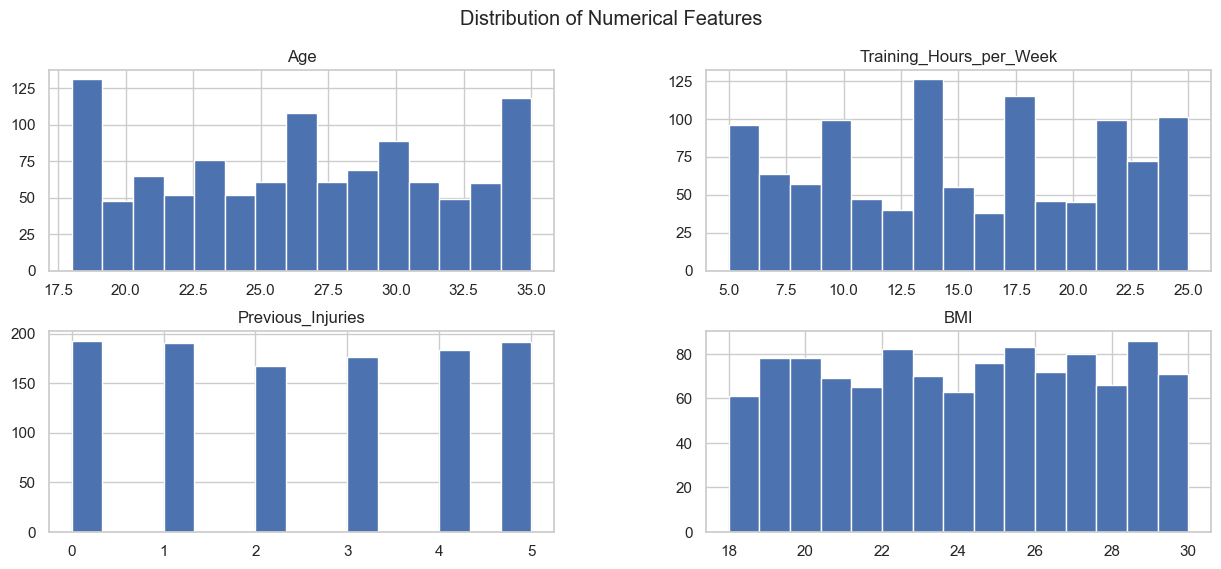

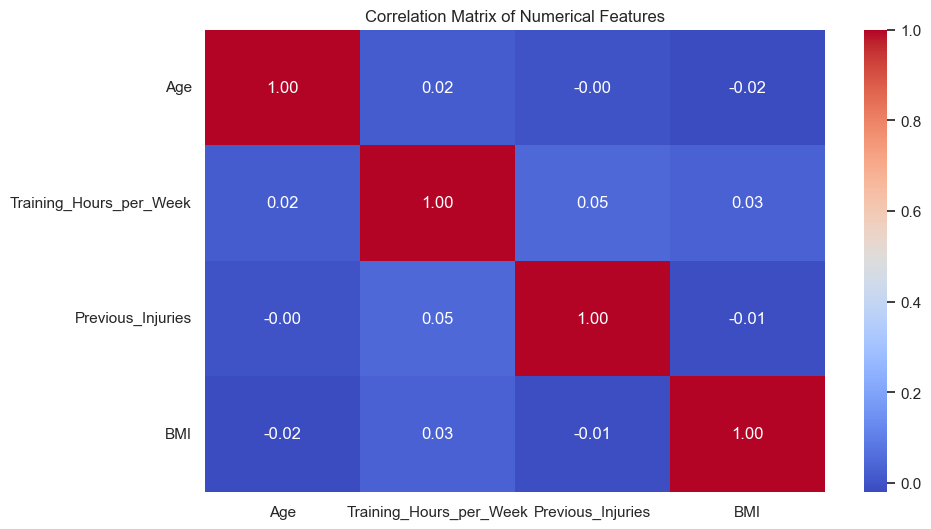

C:\Users\hp\AppData\Local\Temp\ipykernel_28648\81816475.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Injury_Risk', data=desu, palette='Set2')


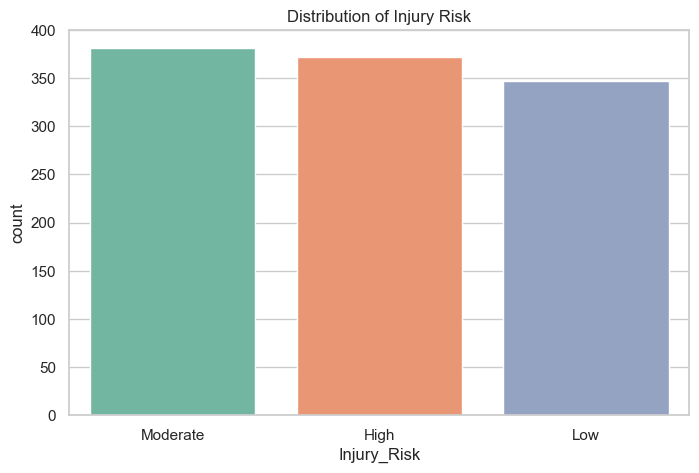

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of numerical features
numerical_features = ['Age', 'Training_Hours_per_Week', 'Previous_Injuries', 'BMI']
desu[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(desu[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Class distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Injury_Risk', data=desu, palette='Set2')
plt.title('Distribution of Injury Risk')
plt.show()

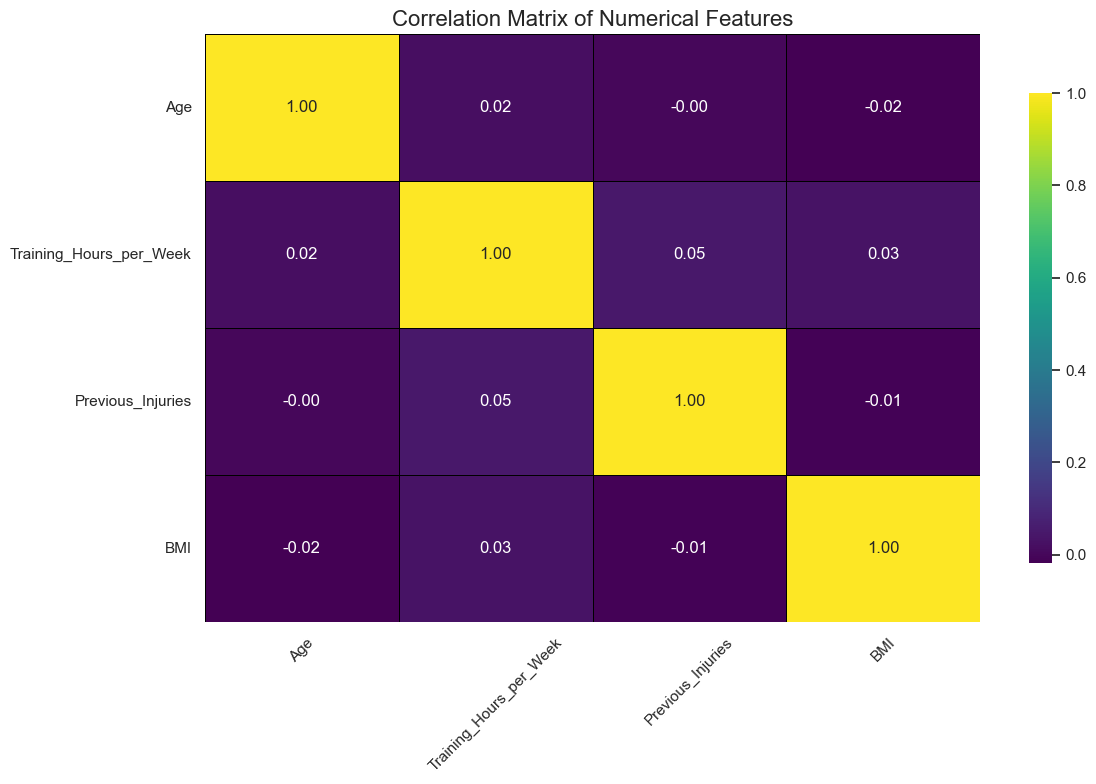

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Assuming 'desu' is your DataFrame and is already defined
# Numerical features to analyze
numerical_features = ['Age', 'Training_Hours_per_Week', 'Previous_Injuries', 'BMI']

# Create a correlation matrix
plt.figure(figsize=(12, 8))  # Increased size for better visibility
corr_matrix = desu[numerical_features].corr()

# Create a heatmap with enhanced features
sns.heatmap(corr_matrix, 
            annot=True,               # Show correlation coefficients
            cmap='viridis',          # Changed color palette
            fmt='.2f',               # Format of the annotations
            linewidths=0.5,          # Adds lines between cells
            linecolor='black',        # Color of the lines
            cbar_kws={"shrink": .8}) # Adjusts color bar size

plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(rotation=0)   # Keep y labels horizontal
plt.tight_layout()        # Adjust layout to prevent clipping
plt.show()


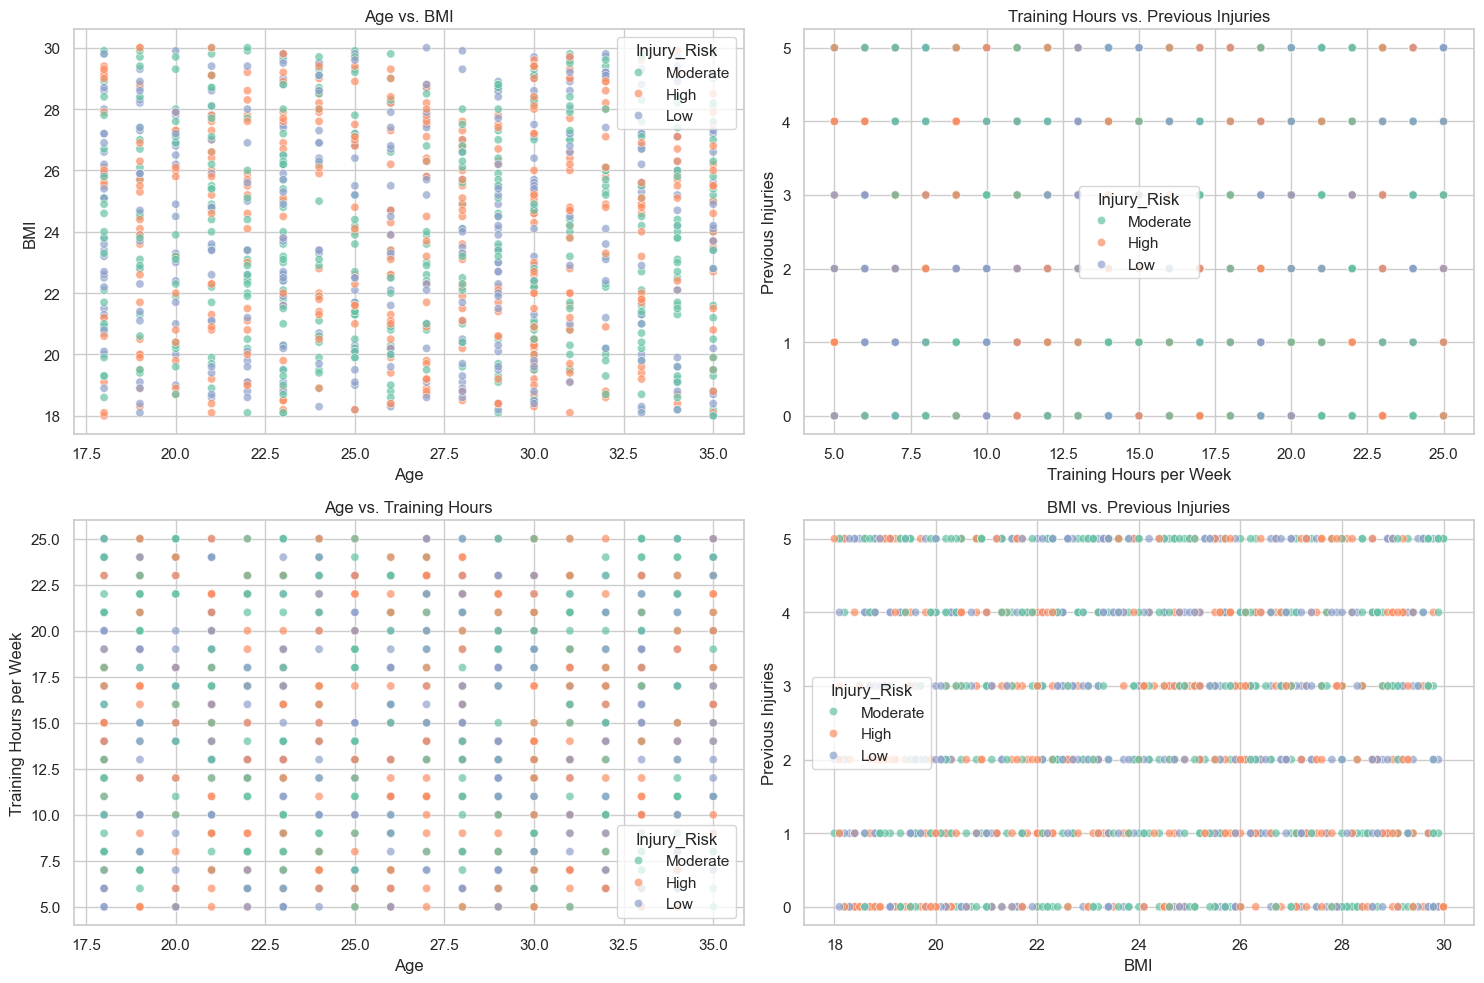

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Assuming 'desu' is your DataFrame and is already defined
# Numerical features to analyze
numerical_features = ['Age', 'Training_Hours_per_Week', 'Previous_Injuries', 'BMI']

# Create scatter plots for pairs of numerical features
plt.figure(figsize=(15, 10))

# Scatter plot for Age vs. BMI
plt.subplot(2, 2, 1)
sns.scatterplot(x='Age', y='BMI', data=desu, hue='Injury_Risk', palette='Set2', alpha=0.7)
plt.title('Age vs. BMI')
plt.xlabel('Age')
plt.ylabel('BMI')

# Scatter plot for Training Hours vs. Previous Injuries
plt.subplot(2, 2, 2)
sns.scatterplot(x='Training_Hours_per_Week', y='Previous_Injuries', data=desu, hue='Injury_Risk', palette='Set2', alpha=0.7)
plt.title('Training Hours vs. Previous Injuries')
plt.xlabel('Training Hours per Week')
plt.ylabel('Previous Injuries')

# Scatter plot for Age vs. Training Hours
plt.subplot(2, 2, 3)
sns.scatterplot(x='Age', y='Training_Hours_per_Week', data=desu, hue='Injury_Risk', palette='Set2', alpha=0.7)
plt.title('Age vs. Training Hours')
plt.xlabel('Age')
plt.ylabel('Training Hours per Week')

# Scatter plot for BMI vs. Previous Injuries
plt.subplot(2, 2, 4)
sns.scatterplot(x='BMI', y='Previous_Injuries', data=desu, hue='Injury_Risk', palette='Set2', alpha=0.7)
plt.title('BMI vs. Previous Injuries')
plt.xlabel('BMI')
plt.ylabel('Previous Injuries')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [224]:
workload_counts = desu.groupby("Age")['Injury_Risk'].count().sort_values().reset_index()

In [225]:
workload_counts.head()

,Age,Injury_Risk
0,20,48
1,32,49
2,24,52
3,22,52
4,27,53


In [226]:
injury_counts = desu.groupby("Age").count().reset_index()
injury_counts = injury_counts.drop('Training_Hours_per_Week', axis =1)
injury_counts.fillna(0, inplace= True)
injury_counts.head()

,Age,Gender,Sport,Previous_Injuries,BMI,Injury_Risk
0,18,68,68,68,68,68
1,19,63,63,63,63,63
2,20,48,48,48,48,48
3,21,65,65,65,65,65
4,22,52,52,52,52,52


In [227]:
# Check for categorical features
categorical_features = desu.select_dtypes(include=['object']).columns
print("Categorical features:", categorical_features)

Categorical features: Index(['Gender', 'Sport', 'Injury_Risk'], dtype='object')


In [228]:
# Save the encoded dataset to a new CSV file
desu.to_csv('sports_injury.csv', index=False)

In [229]:
desu = pd.read_csv('sports_injury.csv')

In [230]:
desu

,Age,Gender,Sport,Training_Hours_per_Week,Previous_Injuries,BMI,Injury_Risk
0,35,Female,Rugby,15,0,24.0,Moderate
1,35,Female,Tennis,23,5,25.0,Moderate
2,35,Female,Rugby,18,3,23.7,High
3,35,Male,Athletics,24,4,23.7,High
4,35,Female,Rugby,23,1,22.7,High
...,...,...,...,...,...,...,...
1095,18,Female,Soccer,8,1,23.8,Moderate
1096,18,Female,Rugby,19,1,22.2,Low
1097,18,Male,Soccer,8,5,24.0,Moderate
1098,18,Male,Soccer,17,2,20.6,High


In [231]:
# Check the column names
print(desu.columns)


Index(['Age', 'Gender', 'Sport', 'Training_Hours_per_Week',
       'Previous_Injuries', 'BMI', 'Injury_Risk'],
      dtype='object')


# Load the Dataset and Summarize Data Distributions

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
desu = pd.read_csv('sports_injury1.csv')

# Display the first few rows
print(desu.head())

# Summary of the dataset
print("\nSummary of the dataset:")
print(desu.info())

# Summary statistics for numerical features
print("\nSummary statistics for numerical features:")
print(desu.describe())

# Class distribution of the target variables 'Injury_Risk_Low'
print("\nClass distribution of Injury_Risk_Low:")
print(desu['Injury_Risk'].value_counts())




   Age  Gender       Sport  Training_Hours_per_Week  Previous_Injuries   BMI  \
0   30    Male  Basketball                       17                  0  20.3   
1   21  Female   Athletics                       10                  1  28.1   
2   33    Male       Rugby                        6                  3  20.0   
3   31  Female   Athletics                       12                  5  28.6   
4   34    Male  Basketball                       13                  3  29.4   

  Injury_Risk  
0        High  
1         Low  
2         Low  
3         Low  
4         Low  

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1100 non-null   int64  
 1   Gender                   1100 non-null   object 
 2   Sport                    1100 non-null   object 
 3   Training_Hours_pe

In [233]:
# Check for missing values
print("Missing values in each column:")
print(desu.isnull().sum())

Missing values in each column:
Age                        0
Gender                     0
Sport                      0
Training_Hours_per_Week    0
Previous_Injuries          0
BMI                        0
Injury_Risk                0
dtype: int64


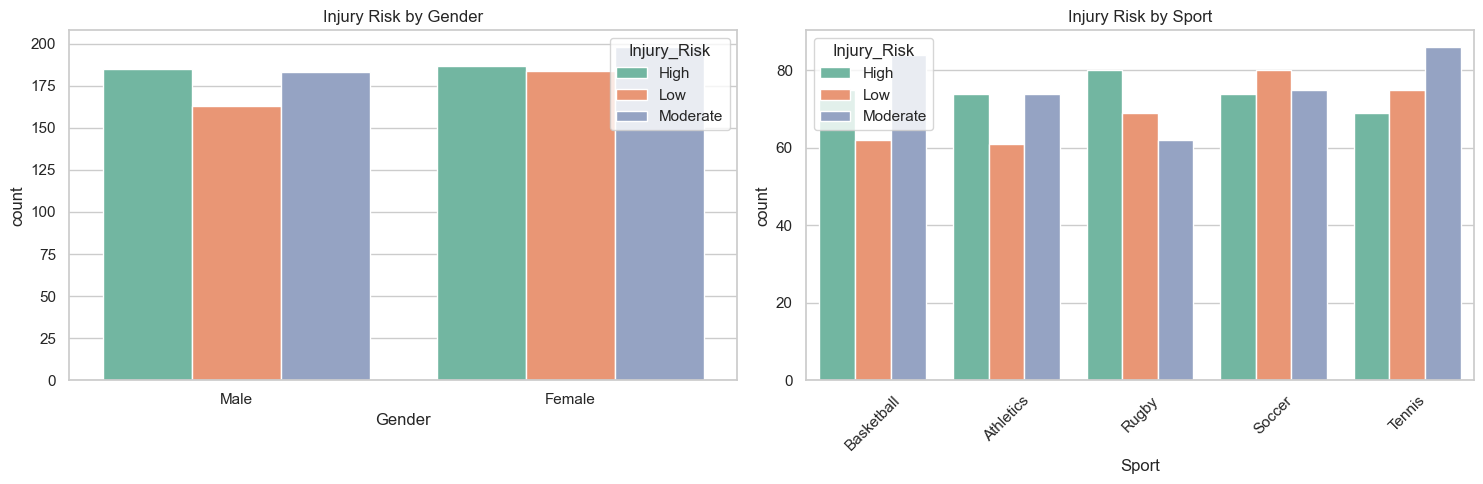

In [234]:
# Count plots for categorical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=desu, x='Gender', hue='Injury_Risk', palette='Set2')
plt.title('Injury Risk by Gender')

plt.subplot(1, 2, 2)
sns.countplot(data=desu, x='Sport', hue='Injury_Risk', palette='Set2')
plt.title('Injury Risk by Sport')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [235]:
# Example using Z-score
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(desu[numerical_features])
desu = desu[(z_scores < 3).all(axis=1)]  # Keep only rows where Z-scores are less than 3


In [236]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features = ['Age', 'Training_Hours_per_Week', 'Previous_Injuries', 'BMI']
scaler = StandardScaler()

# Scale the features
desu[numerical_features] = scaler.fit_transform(desu[numerical_features])


In [237]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the CSV file (assuming preprocessing steps are done)
data = pd.read_csv('sports_injury1.csv')

# Check the data types of the columns to identify non-string columns
print(data.dtypes)

# Convert columns to string if necessary before using .str accessor
data['Gender'] = data['Gender'].astype(str).str.lower().str.strip()
data['Sport'] = data['Sport'].astype(str).str.lower().str.strip()
data['Injury_Risk'] = data['Injury_Risk'].astype(str).str.lower().str.strip()

# Encode categorical features
data = pd.get_dummies(data, columns=['Gender', 'Sport'], drop_first=True)

# Encode target variable
label_encoder = LabelEncoder()
data['Injury_Risk'] = label_encoder.fit_transform(data['Injury_Risk'])

# Split the dataset into features and target variable
X = data.drop(columns=['Injury_Risk'])  # Features
y = data['Injury_Risk']  # Target variable (now numeric)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Age                          int64
Gender                      object
Sport                       object
Training_Hours_per_Week      int64
Previous_Injuries            int64
BMI                        float64
Injury_Risk                 object
dtype: object


In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.37272727272727274
              precision    recall  f1-score   support

           0       0.40      0.46      0.42        74
           1       0.31      0.14      0.20        70
           2       0.37      0.50      0.43        76

    accuracy                           0.37       220
   macro avg       0.36      0.37      0.35       220
weighted avg       0.36      0.37      0.35       220



Plotting the number of injures occured by each athlete

In [239]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.3181818181818182
              precision    recall  f1-score   support

           0       0.37      0.42      0.39        74
           1       0.26      0.21      0.24        70
           2       0.30      0.32      0.31        76

    accuracy                           0.32       220
   macro avg       0.31      0.32      0.31       220
weighted avg       0.31      0.32      0.31       220



In [240]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [241]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the CSV file
data = pd.read_csv('sports_injury.csv')

# Check the column names to find the correct ones
print(data.columns)

# Standardize categorical variables (replace with correct column names)
data['Gender'] = data['Gender'].astype(str).str.lower().str.strip()  # Update with actual column name if needed
data['Sport'] = data['Sport'].astype(str).str.lower().str.strip()  # Update with actual column name if needed
data['Injury_Risk'] = data['Injury_Risk'].astype(str).str.lower().str.strip()

# Encode categorical features
data = pd.get_dummies(data, columns=['Gender', 'Sport'], drop_first=True)  # Correct column name

# Encode target variable
label_encoder = LabelEncoder()
data['Injury_Risk'] = label_encoder.fit_transform(data['Injury_Risk'])

# Split the dataset into features and target variable
X = data.drop(columns=['Injury_Risk'])  # Features
y = data['Injury_Risk']  # Target variable (now numeric)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Evaluation:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Make predictions with KNN
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
print("KNN Evaluation:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")

# Save the models using joblib
joblib.dump(rf_model, 'model_rf.joblib')
joblib.dump(knn_model, 'model_knn.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')



Index(['Age', 'Gender', 'Sport', 'Training_Hours_per_Week',
       'Previous_Injuries', 'BMI', 'Injury_Risk'],
      dtype='object')
Random Forest Evaluation:
[[25 20 29]
 [26 26 18]
 [26 27 23]]
              precision    recall  f1-score   support

           0       0.32      0.34      0.33        74
           1       0.36      0.37      0.36        70
           2       0.33      0.30      0.32        76

    accuracy                           0.34       220
   macro avg       0.34      0.34      0.34       220
weighted avg       0.34      0.34      0.34       220

Random Forest Accuracy: 0.34
KNN Evaluation:
[[39 19 16]
 [32 23 15]
 [33 25 18]]
              precision    recall  f1-score   support

           0       0.38      0.53      0.44        74
           1       0.34      0.33      0.34        70
           2       0.37      0.24      0.29        76

    accuracy                           0.36       220
   macro avg       0.36      0.36      0.35       220
weighted avg   

['label_encoder.joblib']

In [242]:
import joblib

# Load the trained models
label_encoder = joblib.load('label_encoder.joblib')
label_encoder = joblib.load('label_encoder.joblib')
rf_model = joblib.load('model_rf.joblib')
knn_model = joblib.load('model_knn.joblib')
rf_risk_label = label_encoder.inverse_transform([rf_prediction])[0]
knn_risk_label = label_encoder.inverse_transform([knn_prediction])[0]

In [243]:
import pandas as pd
import joblib

# Load the trained models and LabelEncoder
rf_model = joblib.load('model_rf.joblib')
knn_model = joblib.load('model_knn.joblib')
label_encoder = joblib.load('label_encoder.joblib')

# Define a new input sample for prediction
new_data = {
    'Age': 30,
    'Training_Hours_per_Week': 17,
    'Previous_Injuries': 0,
    'BMI': 20.3,
    'Gender': "Male",
    'Sport': "Basketball"
}

# Convert the new input data into a DataFrame
input_df = pd.DataFrame([new_data])

# Clean and standardize categorical variables
# Standardize categorical features
input_df['Gender'] = input_df['Gender'].apply(lambda x: str(x).lower().strip())
input_df['Sport'] = input_df['Sport'].apply(lambda x: str(x).lower().strip())


# One-hot encode the categorical features
input_df_encoded = pd.get_dummies(input_df, columns=['Gender', 'Sport'], drop_first=True)

# Ensure compatibility with training features
expected_features = rf_model.feature_names_in_
input_df_encoded = input_df_encoded.reindex(columns=expected_features, fill_value=0)

# Make predictions
try:
    rf_prediction = rf_model.predict(input_df_encoded)[0]
    knn_prediction = knn_model.predict(input_df_encoded)[0]

    # Map predictions back to labels
    rf_risk_label = label_encoder.inverse_transform([rf_prediction])[0]
    knn_risk_label = label_encoder.inverse_transform([knn_prediction])[0]

    # Print predictions
    print(f"Random Forest Injury Risk Prediction: {rf_risk_label.capitalize()}")
    print(f"KNN Injury Risk Prediction: {knn_risk_label.capitalize()}")

except Exception as e:
    print("Error during prediction:", e)

Random Forest Injury Risk Prediction: High
KNN Injury Risk Prediction: High


In [244]:
pip install fastapi uvicorn pandas joblib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
